# Fuel consumption dataset

This notebook explores the datasets from  https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64 between 1995 and 2022

In [1]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

In [2]:
def box_plot(dataframe, col_list_float, plot_kind):
    """
    This function generates boxplots to show distribution and outliers of various parameters
    """
    
   
    x_val = 1
    y_val = len(col_list_float)
        
    if len(dataframe['model_year'].unique()) ==1:
        title_year = dataframe['model_year'].min()
    else:
        title_year = f'{dataframe["model_year"].min()} - {dataframe["model_year"].max()}'
        
    fig1, axes = plt.subplots(x_val,y_val , sharey=True, figsize=(18,6))
    
    k=0
    for i in range(0,x_val):
        for j in range(0,y_val):

            variable= col_list_float[k].lower()
            if plot_kind=="box":
                sns.boxplot(ax=axes[j], data=dataframe, x=variable)
                fig1.suptitle(f'Outlier identification by vehicle class {title_year}')
            elif plot_kind=="hist":
                sns.histplot(ax=axes[j], data=dataframe, x=variable,bins=10)
                fig1.suptitle(f'Distribution of data {title_year}')
            k+=1
    plt.show()

In [3]:
def find_outliers_tukey(x):
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indeces = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indeces])
    
    return outlier_values

def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott',fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_value

### Read data

In [4]:
folder = "C:/Users/Laura GF/Documents/GitHub/machine-learning-capstone/data/"
raw_data = f'{folder}raw-data/'
clean_data = f'{folder}clean-data/'

file_name_2022 = "2022_Fuel_Consumption_Ratings_(2022-08-18).csv"
file_name_2021 = "2021_Fuel_Consumption_Ratings_(2022-08-09).csv"
file_name_2020 = "2020_Fuel_Consumption_Ratings_(2021-09-29).csv"
file_name_2019 = "2019_Fuel_Consumption_Ratings_(2021-09-29).csv"
file_name_2018 = "2018_Fuel_Consumption_Ratings_(2021-09-29).csv"
file_name_2017 = "2017_Fuel_Consumption_Ratings_(2020-03-17).csv"
file_name_2016 = "2016_Fuel_Consumption_Ratings_(2020-03-17).csv"
file_name_2015 = "2015_Fuel_Consumption_Ratings_(2020-03-17).csv"
file_name_2010_2014 = "2010-2014_Fuel_Consumption_Ratings_(2020-03-17).csv"
file_name_2005_2009 = "2005-2009_Fuel_Consumption_Ratings_(2020-01-31).csv"
file_name_2000_2004 = "2000-2004_Fuel_Consumption_Ratings.csv"
file_name_1995_1999 = "1995-1999_Fuel_Consumption_Ratings.csv"

file_name_2022_1995 = "1999_2022_Fuel_Consumption_Ratings.csv"

In [5]:
fuel_score_2022 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2022}'), index_col=0)
fuel_score_2021 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2021}'), index_col=0)
fuel_score_2020 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2020}'), index_col=0)
fuel_score_2019 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2019}'), index_col=0)
fuel_score_2018 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2018}'), index_col=0)
fuel_score_2017 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2017}'), index_col=0)
fuel_score_2016 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2016}'), index_col=0)
fuel_score_2015 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2015}'), index_col=0)
fuel_score_2010_2014 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2010_2014}'), index_col=0)
fuel_score_2005_2009 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2005_2009}'), index_col=0)
fuel_score_2000_2004 = pd.read_csv(Path(folder + "clean-data",f'{file_name_2000_2004}'), index_col=0)
fuel_score_1995_1999 = pd.read_csv(Path(folder + "clean-data",f'{file_name_1995_1999}'), index_col=0)

# Master df
master_df = pd.read_csv(Path(folder + "clean-data",f'{file_name_2022_1995}'), index_col=0)

In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43934 entries, 1 to 3519
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     43934 non-null  int64  
 1   make_                          43934 non-null  object 
 2   model.1_                       43934 non-null  object 
 3   vehicleclass_                  43934 non-null  object 
 4   enginesize_(l)                 43934 non-null  float64
 5   cylinders_                     43934 non-null  float64
 6   transmission_                  43934 non-null  object 
 7   fuel_type                      43934 non-null  object 
 8   fuelconsumption_city(l/100km)  43934 non-null  float64
 9   fuelconsumption_hwy(l/100km)   43934 non-null  float64
 10  fuelconsumption_comb(l/100km)  43934 non-null  float64
 11  fuelconsumption_comb(mpg)      43934 non-null  int64  
 12  co2emissions_(g/km)            43934 non-null  

## Clean data

In [7]:
master_df.duplicated().sum()

6

In [8]:
master_df[master_df.duplicated()]

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating
379,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8.0,A4,Z,19.6,14.9,17.5,16,403,NaN,NaN
591,1995,NISSAN,AXXESS,MINIVAN,2.4,4.0,A4,X,13.5,10.5,12.2,23,281,NaN,NaN
593,1995,NISSAN,AXXESS,MINIVAN,2.4,4.0,M5,X,12.6,9.9,11.4,25,262,NaN,NaN
379,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8.0,A4,Z,17.7,12.7,15.4,18,354,NaN,NaN
748,1995,NISSAN,AXXESS,MINIVAN,2.4,4.0,A4,X,12.0,8.9,10.6,27,244,NaN,NaN
750,1995,NISSAN,AXXESS,MINIVAN,2.4,4.0,M5,X,11.1,8.4,9.9,29,228,NaN,NaN


In [9]:
master_df.drop_duplicates(keep='first', inplace=True)

In [10]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43928 entries, 1 to 3519
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     43928 non-null  int64  
 1   make_                          43928 non-null  object 
 2   model.1_                       43928 non-null  object 
 3   vehicleclass_                  43928 non-null  object 
 4   enginesize_(l)                 43928 non-null  float64
 5   cylinders_                     43928 non-null  float64
 6   transmission_                  43928 non-null  object 
 7   fuel_type                      43928 non-null  object 
 8   fuelconsumption_city(l/100km)  43928 non-null  float64
 9   fuelconsumption_hwy(l/100km)   43928 non-null  float64
 10  fuelconsumption_comb(l/100km)  43928 non-null  float64
 11  fuelconsumption_comb(mpg)      43928 non-null  int64  
 12  co2emissions_(g/km)            43928 non-null  

In [11]:
master_df[master_df['co2_rating'].isna()]['model_year'].unique()

array([2015, 2010, 2011, 2012, 2013, 2014, 2005, 2006, 2007, 2008, 2009,
       2000, 2001, 2002, 2003, 2004, 1995, 1996, 1997, 1998, 1999],
      dtype=int64)

#### NaN values in CO2 rating and smog rating columns are due to non-existing ratings between the years 1995 - 2015

In [12]:
master_df.head()

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating
1,2022,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,200,6.0,3.0
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4.0,5.0
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0
5,2022,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0


### Outliers and scaling

In [19]:
df_list = [fuel_score_2022, fuel_score_2021,
          fuel_score_2020, fuel_score_2019,
          fuel_score_2018,fuel_score_2017]      

fuel_info = [
              'fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',	
              'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)',
                  ]     

engine_info  = ['enginesize_(l)','cylinders_','co2_rating','co2emissions_(g/km)','smog_rating']

In [20]:
outliers = {}
for item in fuel_info:
    outliers[item] = np.sort(find_outliers_tukey(master_df[item]))
    print(item, len(outliers[item]))
    
for item in engine_info:
    outliers[item] = np.sort(find_outliers_tukey(master_df[item]))
    print(item, len(outliers[item]))

fuelconsumption_city(l/100km) 5693
fuelconsumption_hwy(l/100km) 6601
fuelconsumption_comb(l/100km) 6159
fuelconsumption_comb(mpg) 6839
enginesize_(l) 642
cylinders_ 155
co2_rating 0
co2emissions_(g/km) 4754
smog_rating 0


In [21]:
len(outliers['fuelconsumption_city(l/100km)'])

5693

### The data has a positive skew

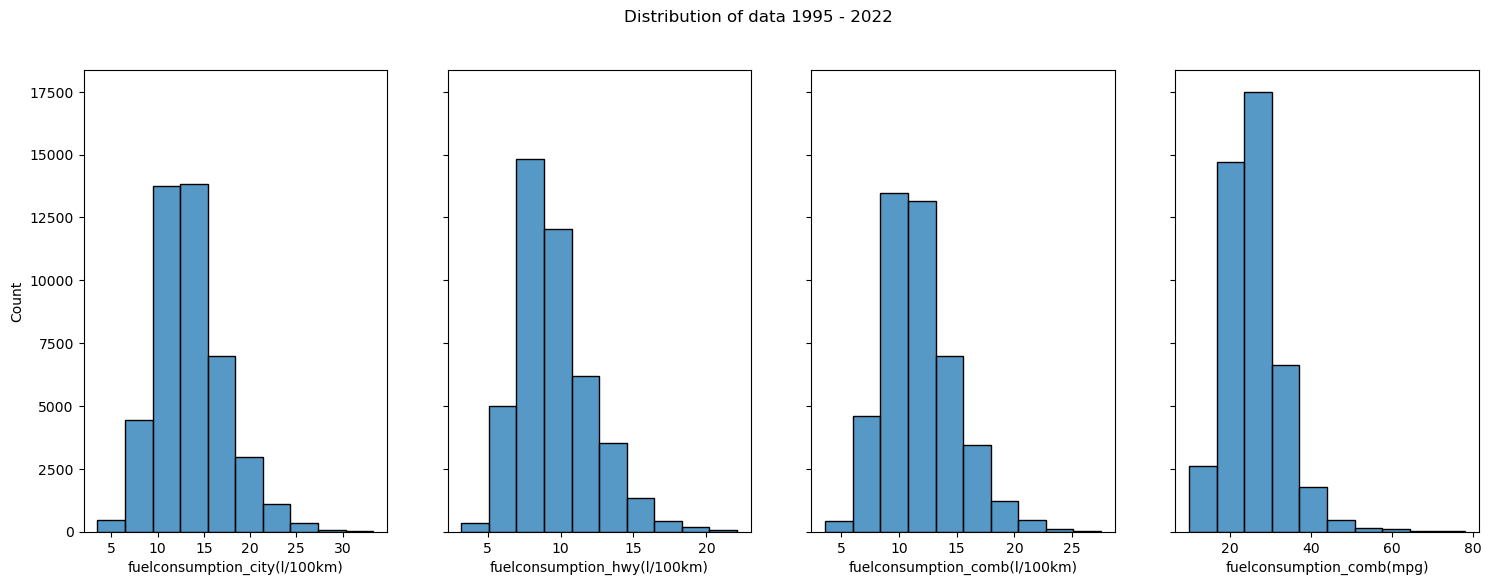

In [22]:

box_plot(master_df,fuel_info,"hist")

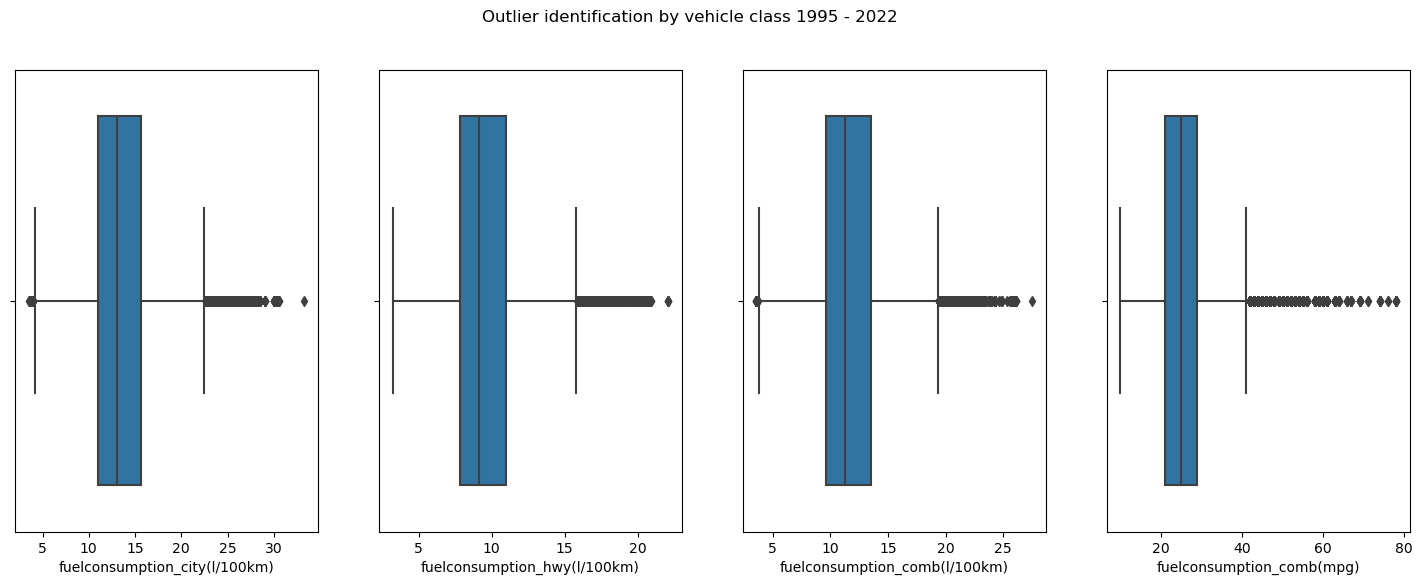

In [23]:
box_plot(master_df,fuel_info,"box")

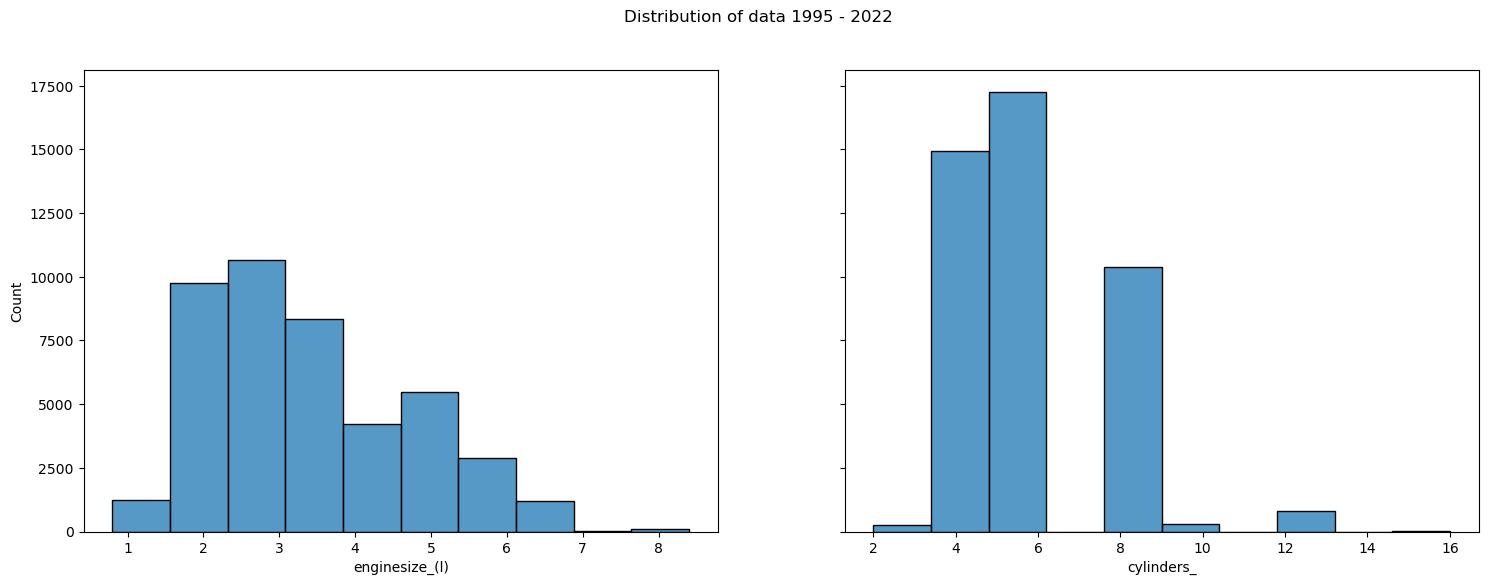

In [24]:
engine_info  = ['EngineSize_(L)','Cylinders_']
box_plot(master_df,engine_info,'hist')

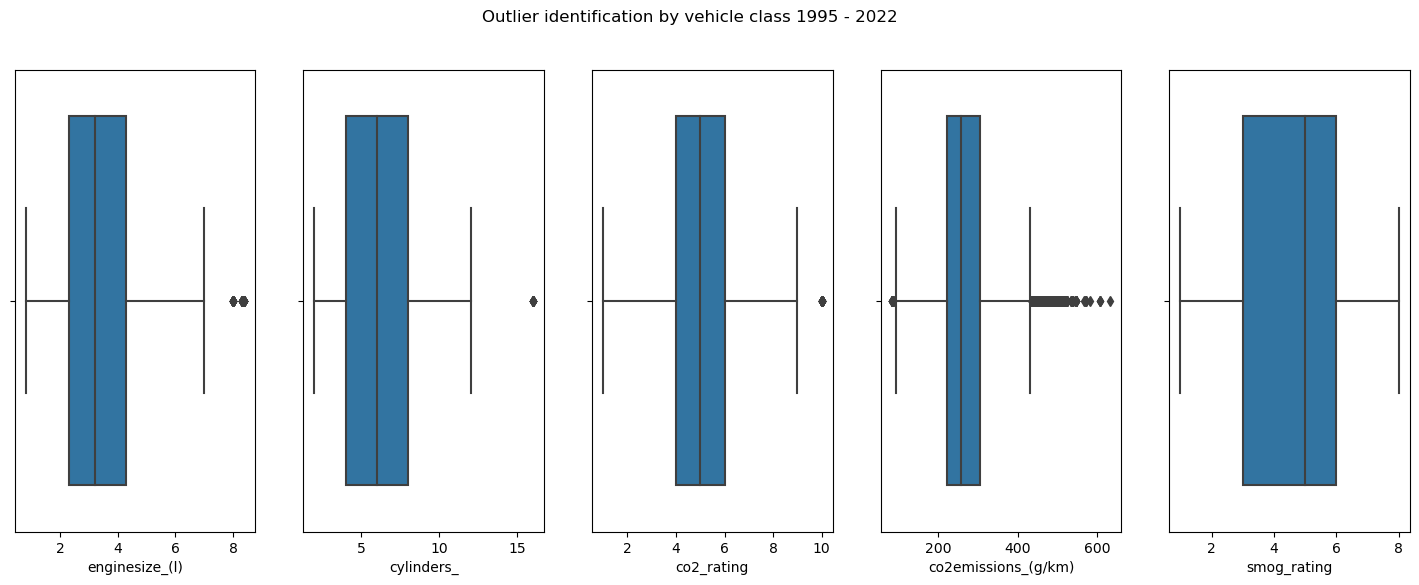

In [25]:
engine_info  = ['EngineSize_(L)','Cylinders_','co2_rating','CO2Emissions_(g/km)','smog_rating']
box_plot(master_df,engine_info,'box')

In [26]:
master_df[~master_df['co2_rating'].isna()]

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating
1,2022,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,200,6.0,3.0
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4.0,5.0
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0
5,2022,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2016,VOLVO,XC70 T5,SUV - SMALL,2.0,4.0,AS8,X,10.3,7.6,9.1,31,213,6.0,NaN
1107,2016,VOLVO,XC70 T5 AWD,SUV - SMALL,2.5,5.0,AS6,X,12.5,9.2,11.0,26,254,5.0,NaN
1108,2016,VOLVO,XC90 T5,SUV - STANDARD,2.0,4.0,AS8,Z,10.6,9.1,10.0,28,232,5.0,NaN
1109,2016,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4.0,AS8,Z,10.8,9.5,10.2,28,239,5.0,NaN


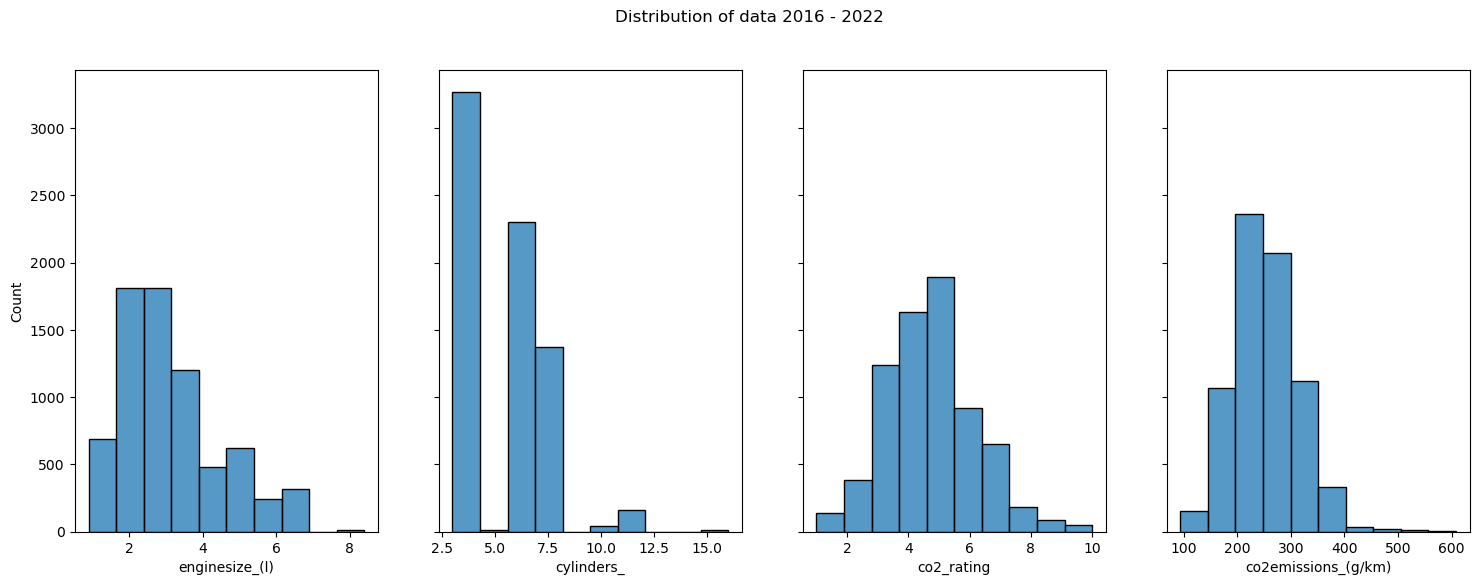

In [27]:
non_na_rating = master_df[~master_df['co2_rating'].isna()]
box_plot(non_na_rating,['EngineSize_(L)','Cylinders_','co2_rating','CO2Emissions_(g/km)'],"hist")

### Using natural logarithm

In [28]:
master_df_log_app = master_df.copy()

In [29]:
fuel_info = [
              'fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',	
              'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)',]
    
engine_info  = ['enginesize_(l)','co2emissions_(g/km)','smog_rating']

In [30]:
for item in fuel_info:
    master_df_log_app[item] = master_df_log_app[item].apply(lambda x: np.log(x))
    
for item in engine_info:
    master_df_log_app[item] = master_df_log_app[item].apply(lambda x: np.log(x))

In [31]:
master_df_log_app.head()

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating
1,2022,Acura,ILX,Compact,0.875469,4.0,AM8,Z,2.292535,1.945910,2.151762,3.496508,5.298317,6.0,1.098612
2,2022,Acura,MDX SH-AWD,SUV: Small,1.252763,6.0,AS10,Z,2.533697,2.240710,2.415914,3.218876,5.572154,4.0,1.609438
3,2022,Acura,RDX SH-AWD,SUV: Small,0.693147,4.0,AS10,Z,2.397895,2.151762,2.292535,3.367296,5.446737,5.0,1.791759
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,0.693147,4.0,AS10,Z,2.424803,2.208274,2.332144,3.295837,5.488938,5.0,1.791759
5,2022,Acura,TLX SH-AWD,Compact,0.693147,4.0,AS10,Z,2.415914,2.079442,2.282382,3.367296,5.438079,5.0,1.945910


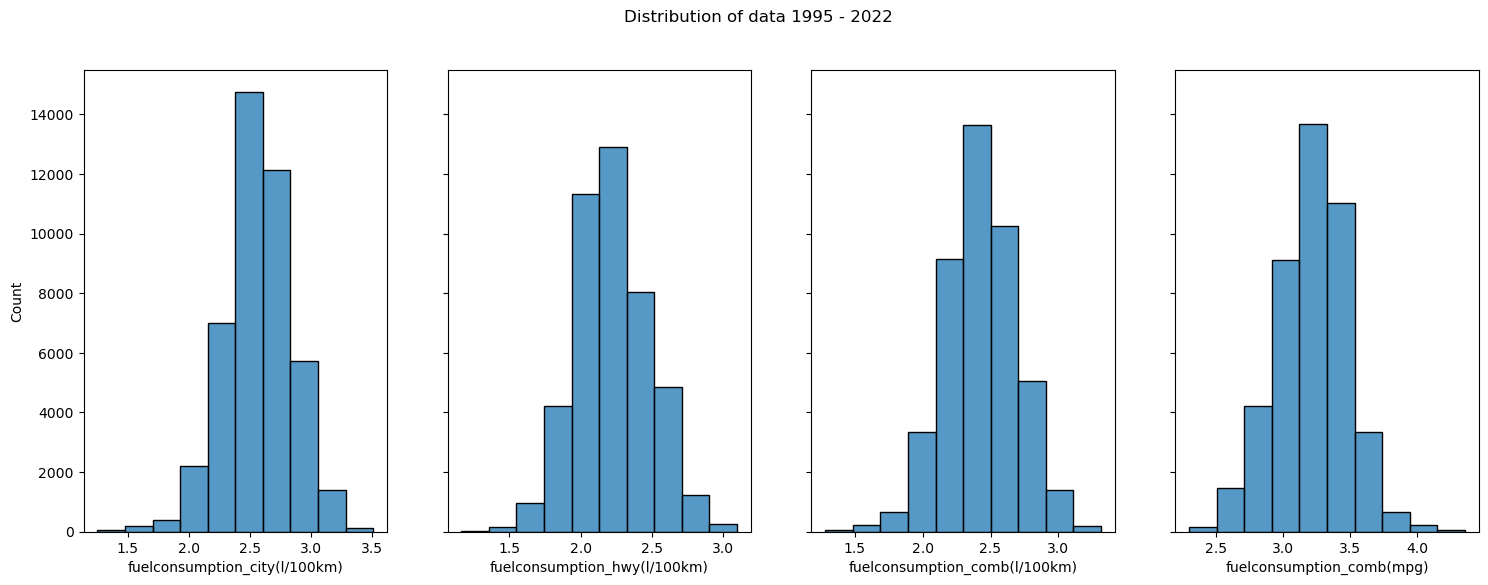

In [32]:
box_plot(master_df_log_app,fuel_info,"hist")


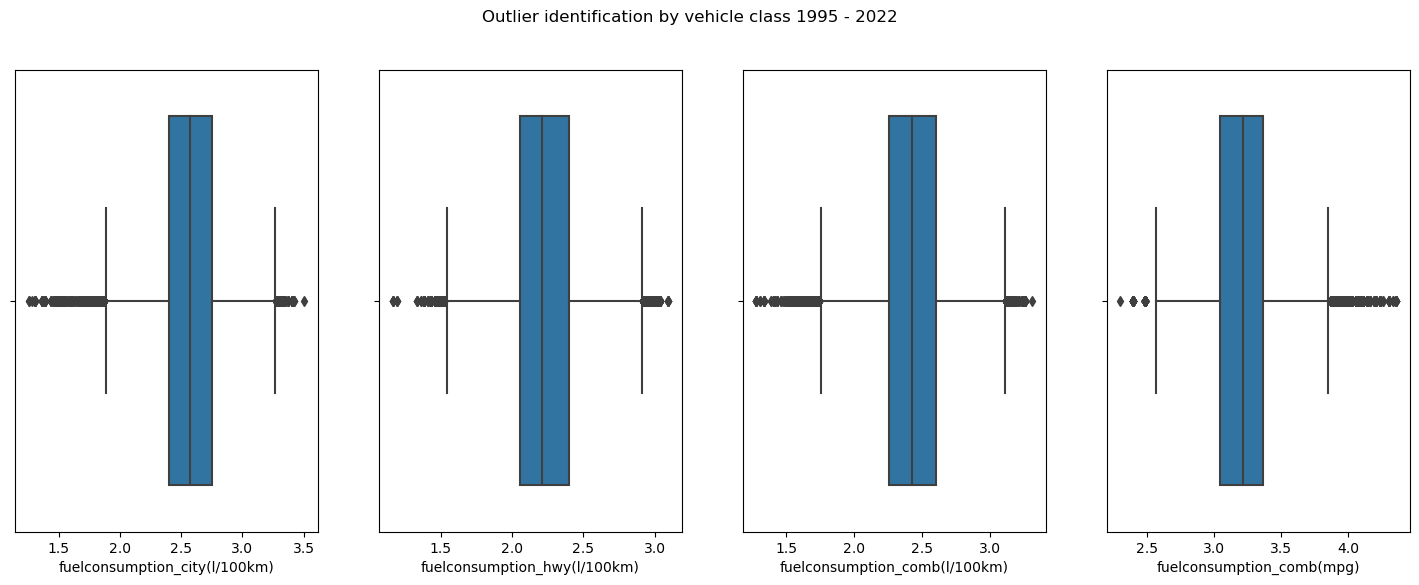

In [33]:
box_plot(master_df_log_app,fuel_info,"box")

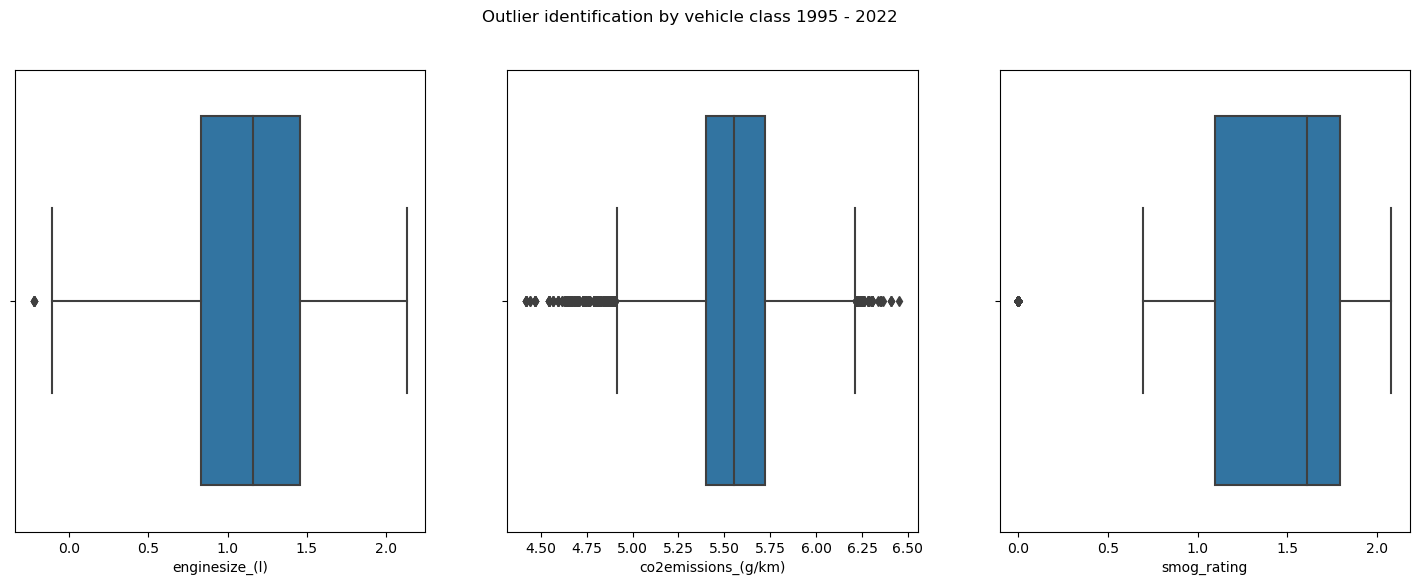

In [34]:
box_plot(master_df_log_app,engine_info,"box")

In [35]:
outliers_log = {}
for item in fuel_info:
    outliers[item] = np.sort(find_outliers_tukey(master_df_log_app[item]))
    print(item, len(outliers[item]))
    
for item in engine_info:
    outliers[item] = np.sort(find_outliers_tukey(master_df_log_app[item]))
    print(item, len(outliers[item]))

fuelconsumption_city(l/100km) 4443
fuelconsumption_hwy(l/100km) 2425
fuelconsumption_comb(l/100km) 3743
fuelconsumption_comb(mpg) 4288
enginesize_(l) 31
co2emissions_(g/km) 3057
smog_rating 0


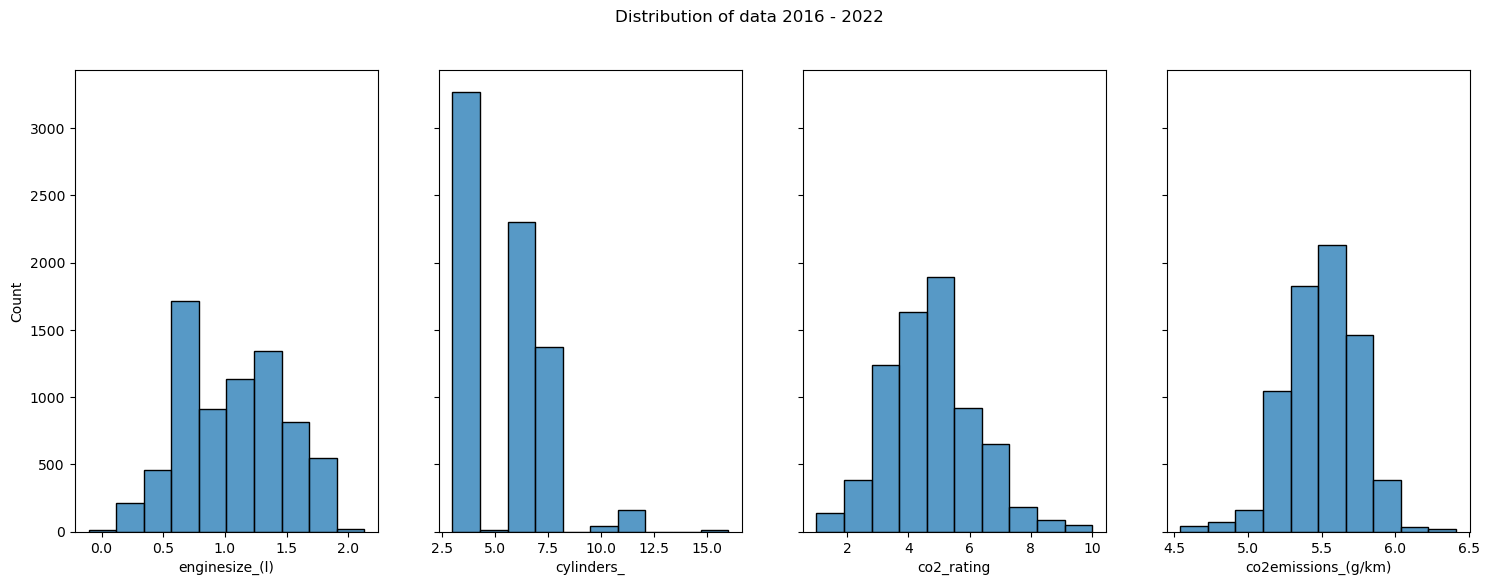

In [36]:
non_na_rating_log = master_df_log_app[~master_df_log_app['co2_rating'].isna()]
box_plot(non_na_rating_log,['EngineSize_(L)','Cylinders_','co2_rating','CO2Emissions_(g/km)'],"hist")

## Predicting CO2 ratings for remaining values - feature engineering

In [37]:
master_df_log_app

,model_year,make_,model.1_,vehicleclass_,enginesize_(l),cylinders_,transmission_,fuel_type,fuelconsumption_city(l/100km),fuelconsumption_hwy(l/100km),fuelconsumption_comb(l/100km),fuelconsumption_comb(mpg),co2emissions_(g/km),co2_rating,smog_rating
1,2022,Acura,ILX,Compact,0.875469,4.0,AM8,Z,2.292535,1.945910,2.151762,3.496508,5.298317,6.0,1.098612
2,2022,Acura,MDX SH-AWD,SUV: Small,1.252763,6.0,AS10,Z,2.533697,2.240710,2.415914,3.218876,5.572154,4.0,1.609438
3,2022,Acura,RDX SH-AWD,SUV: Small,0.693147,4.0,AS10,Z,2.397895,2.151762,2.292535,3.367296,5.446737,5.0,1.791759
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,0.693147,4.0,AS10,Z,2.424803,2.208274,2.332144,3.295837,5.488938,5.0,1.791759
5,2022,Acura,TLX SH-AWD,Compact,0.693147,4.0,AS10,Z,2.415914,2.079442,2.282382,3.367296,5.438079,5.0,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,1999,VOLVO,V70 T5 TURBO WAGON,STATION WAGON - MID-SIZE,0.832909,5.0,A4,Z,2.476538,2.066863,2.312535,3.332205,5.446737,NaN,NaN
3516,1999,VOLVO,V70 T5 TURBO WAGON,STATION WAGON - MID-SIZE,0.832909,5.0,M5,Z,2.476538,2.066863,2.312535,3.332205,5.446737,NaN,NaN
3517,1999,VOLVO,V70 WAGON,STATION WAGON - MID-SIZE,0.875469,5.0,A4,Z,2.451005,2.041220,2.282382,3.367296,5.416100,NaN,NaN
3518,1999,VOLVO,V70 WAGON,STATION WAGON - MID-SIZE,0.875469,5.0,M5,Z,2.415914,2.028148,2.261763,3.367296,5.398163,NaN,NaN
